# aSPEM Experiment : analysis


Test de différtentes pentes $k$ pour la relation entre $p_bet$ et $\hat{p}$


In [1]:
%run ../0_parameters.ipynb


WELCOME



In [2]:
import glob
import bayesianchangepoint as bcp

In [3]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)

In [4]:
from aSPEM import Analysis
e = Analysis(name_file_fit='fct_velocity_sigmo')

In [5]:
def sigmoid(y):
    return 1 / (1 + np.exp(-y))
def logit(p):
    return np.log(p / (1 - p))

/home/drone/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/drone/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


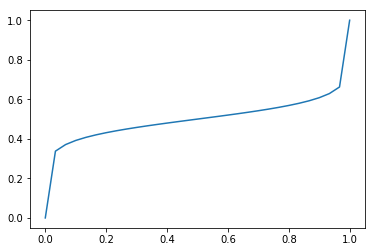

In [6]:
p = np.linspace(0, 1, 31)
plt.plot(p, sigmoid(.2*logit(p)))

/home/drone/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/drone/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


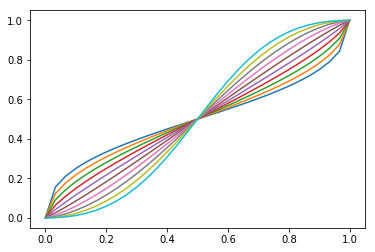

In [7]:
for k in np.logspace(-1, 1, 10, base=2):
    plt.plot(p, sigmoid(k*logit(p)))

/home/drone/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/drone/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


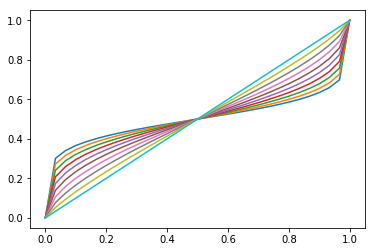

In [8]:
for k in np.logspace(-2, 0, 10, base=2):
    plt.plot(p, sigmoid(k*logit(p)))

In [9]:
def r_(p, data) :
    
    p = np.ma.masked_array(p, mask=np.isnan(data)).compressed()
    data = np.ma.masked_array(data, mask=np.isnan(data)).compressed()

    from scipy import stats
    slope, intercept, r_, p_value, std_err = stats.linregress(p, data)
    
    return r_

In [10]:
Full = e.Full_list(modes_bcp=[])
modes_bcp = 'mean'
tau = np.arange(1, 206, 5) #np.arange(1, 602, 1)
list_h = 1/tau
#print(h)

r_k_s, h_k_s = {}, {}
for num, s in enumerate(list(set(Full.sujet))):
    print(s, end=' ')
    
    bet = Full['results'][Full.sujet==s].values.tolist()
    x = np.array(Full['bino'][Full.sujet==s].values.tolist())

    r_k, h_k = [], []
    for k in range(11) : r_k.append([]) ; h_k.append([])
    
    for num, k in enumerate(np.logspace(-1, 1, 10, base=2)) :
        
        r_bet_l, r_bet_ = [], []
        
        for h in list_h :
            
            p_hat = np.zeros(600)
            liste = np.arange(0, 601, 50)
            for a in range(len(liste)-1) :
                p_bar, r_bar, beliefs = bcp.inference(x[liste[a]:liste[a+1]], h=h, p0=.5, r0=1.)
                p_hat_p, r_hat = bcp.readout(p_bar, r_bar, beliefs, mode=modes_bcp, p0=.5, fixed_window_size=40)
                p_hat[liste[a]:liste[a+1]] = p_hat_p

            if num==0 : r_bet_.append(r_(p_hat.tolist(), bet))
            r_bet_l.append(r_(sigmoid(k*logit(p_hat)), bet))

        if num==0 : h_k[0]=list_h[np.argmax(r_bet_)] ; r_k[0]=np.max(r_bet_)
        h_k[num+1]=list_h[np.argmax(r_bet_l)] ; r_k[num+1]=np.max(r_bet_l)
        
    h_k_s[s], r_k_s[s] = h_k, r_k

AM 

/usr/local/lib/python3.5/dist-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/usr/local/lib/python3.5/dist-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


SR LB FM TN YK CS RS BMC IP OP DC 

Plot de R en fonction de la pente

No handles with labels found to put in legend.
No handles with labels found to put in legend.


		sans logit|avec logit (max r)

-------------------------------------------------------------------------------------
AM	k:	         |0.926
	h(tau):	0.005(201)|0.005(201)
	r:	0.916    |0.917
-------------------------------------------------------------------------------------
SR	k:	         |2.000
	h(tau):	0.005(201)|0.005(201)
	r:	0.878    |0.888
-------------------------------------------------------------------------------------
LB	k:	         |0.680
	h(tau):	0.048(21)|0.048(21)
	r:	0.871    |0.873
-------------------------------------------------------------------------------------
FM	k:	         |0.500
	h(tau):	0.062(16)|0.048(21)
	r:	0.795    |0.809
-------------------------------------------------------------------------------------
CS	k:	         |0.500
	h(tau):	0.167(6)|0.091(11)
	r:	0.734    |0.742
-------------------------------------------------------------------------------------
RS	k:	         |1.000
	h(tau):	0.006(161)|0.006(161)
	r:	0.647    |0.647
--------------------

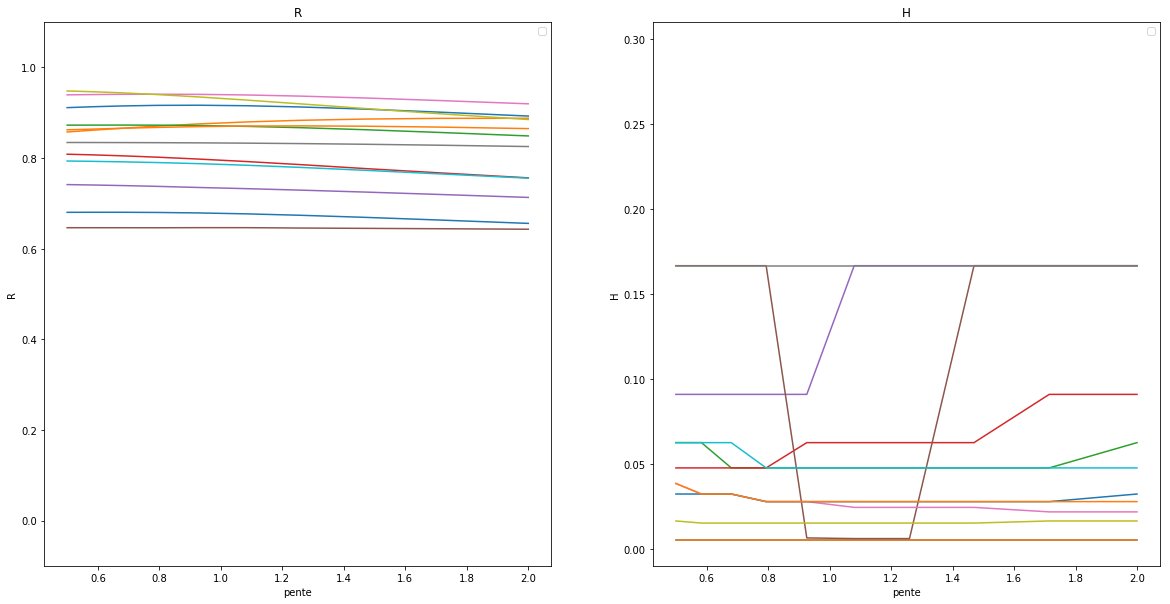

In [12]:
fig, ax = plt.subplots(1,2,figsize=(2*10,10))

list_k = np.logspace(-1, 1, 10, base=2)
print('\t\tsans logit|avec logit (max r)\n')
print('-'*85)

for num, s in enumerate(h_k_s.keys()) :
    h_k, r_k = np.array(h_k_s[s]), np.array(r_k_s[s])
    
    r_m   = np.max(r_k)
    arg_m = np.argmax(r_k)
    h_m   = h_k[arg_m]
    
    if arg_m==0 : k_m = 1
    else :       k_m = list_k[arg_m-1]
    
    print('%s\tk:\t         |%.3f'%(s, k_m))
    print('\th(tau):\t%.3f(%.0f)|%.3f(%.0f)'%(h_k[0], 1/h_k[0], h_m, 1/h_m))
    print('\tr:\t%.3f    |%.3f'%(r_k[0], r_m))
    print('-'*85)
    
    ax[0].plot(list_k, r_k[1:])
    ax[1].plot(list_k, h_k[1:])

ax[0].set_ylim(-0.1, 1.1)
ax[1].set_ylim(-0.01, 0.31)
        
ax[0].set_title('R') ; ax[1].set_title('H')
ax[0].set_ylabel('R') ; ax[1].set_ylabel('H')
for a in range(2) : ax[a].legend() ; ax[a].set_xlabel('pente')

/home/drone/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/drone/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


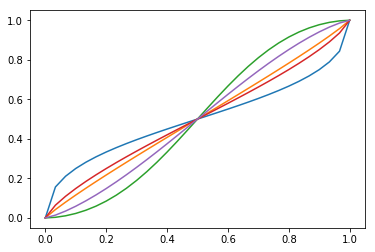

In [13]:
p = np.linspace(0, 1, 31)

for k in [0.500, 0.926, 1.714, 0.794, 1.260]:
    plt.plot(p, sigmoid(k*logit(p)))